# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/theluggage/python-api-challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# units = "imperial"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# # Print the response object to the console
print(requests.get(url))

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

<Response [401]>


NameError: name 'weather_json' is not defined

In [5]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Create recepticles for the data to populate when the loop is run.
city_names = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []

#Create where we are starting and a counter to add one as we go along the loop and hopefully get over 500 entries required..
index_start = 0
counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

#Use a loop and enumerate to create a list that will loop and populate the recepticles above. 
#Put a try/except, so we can clean the data in a dataframe after the dataframe is made.
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        city_names.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
 
 #Use an if statement to add on one city from the random cities as loops.       
        if index_start > 504:
            index_start = 0
            counter = counter + 1
    
        else:
            index_start = index_start + 1
            
        print(f"Processing Record {index_start} of Set {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : bluff
Processing Record 2 of Set 1 : trincomalee
City not found. Skipping...
Processing Record 3 of Set 1 : yellowknife
City not found. Skipping...
Processing Record 4 of Set 1 : lorengau
Processing Record 5 of Set 1 : port alfred
Processing Record 6 of Set 1 : anadyr
Processing Record 7 of Set 1 : kalianget
Processing Record 8 of Set 1 : ilulissat
Processing Record 9 of Set 1 : avera
Processing Record 10 of Set 1 : pisco
Processing Record 11 of Set 1 : puerto ayora
Processing Record 12 of Set 1 : jamestown
Processing Record 13 of Set 1 : vila velha
Processing Record 14 of Set 1 : bathsheba
Processing Record 15 of Set 1 : rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 : kaeo
Processing Record 17 of Set 1 : hobart
Processing Record 18 of Set 1 : busselton
City not found. Skipping...
Processing Record 19 of Set 1 : barrow
Processing Record 20 of Set 1 : sev

Processing Record 188 of Set 1 : port elizabeth
City not found. Skipping...
Processing Record 189 of Set 1 : dingle
Processing Record 190 of Set 1 : pontes e lacerda
Processing Record 191 of Set 1 : castro
Processing Record 192 of Set 1 : saurimo
Processing Record 193 of Set 1 : roebourne
Processing Record 194 of Set 1 : manggar
Processing Record 195 of Set 1 : shenjiamen
Processing Record 196 of Set 1 : kodiak
Processing Record 197 of Set 1 : dashitou
Processing Record 198 of Set 1 : grabovo
Processing Record 199 of Set 1 : victoria
Processing Record 200 of Set 1 : leeton
Processing Record 201 of Set 1 : nome
Processing Record 202 of Set 1 : nanortalik
Processing Record 203 of Set 1 : socorro
Processing Record 204 of Set 1 : mogok
Processing Record 205 of Set 1 : yaan
Processing Record 206 of Set 1 : sao miguel do araguaia
Processing Record 207 of Set 1 : high prairie
City not found. Skipping...
Processing Record 208 of Set 1 : kyzyl-suu
Processing Record 209 of Set 1 : matagami
Proce

Processing Record 373 of Set 1 : bahia blanca
Processing Record 374 of Set 1 : labuhan
Processing Record 375 of Set 1 : riyadh
Processing Record 376 of Set 1 : leningradskiy
Processing Record 377 of Set 1 : moose factory
Processing Record 378 of Set 1 : zhanakorgan
City not found. Skipping...
Processing Record 379 of Set 1 : lewisporte
Processing Record 380 of Set 1 : falkensee
Processing Record 381 of Set 1 : opuwo
Processing Record 382 of Set 1 : agadir
Processing Record 383 of Set 1 : bilkha
Processing Record 384 of Set 1 : tezu
Processing Record 385 of Set 1 : belgrade
Processing Record 386 of Set 1 : kahului
Processing Record 387 of Set 1 : coihaique
Processing Record 388 of Set 1 : santa fe
Processing Record 389 of Set 1 : sosua
Processing Record 390 of Set 1 : victor harbor
Processing Record 391 of Set 1 : kasulu
City not found. Skipping...
City not found. Skipping...
Processing Record 392 of Set 1 : linjiang
Processing Record 393 of Set 1 : verkhnya syrovatka
City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a data frame.

city_weather_df = pd.DataFrame({
    "City": city_names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})

city_weather_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.29,83,100,14.74,NZ,1635129085
1,Trincomalee,8.5711,81.2335,80.04,79,100,6.67,LK,1635129085
2,Yellowknife,62.4560,-114.3525,39.72,100,75,13.80,CA,1635128821
3,Lorengau,-2.0226,147.2712,83.53,75,35,6.85,PG,1635128824
4,Port Alfred,-33.5906,26.8910,56.48,79,0,10.69,ZA,1635129086
...,...,...,...,...,...,...,...,...,...
545,Isangel,-19.5500,169.2667,82.51,69,75,6.91,VU,1635129316
546,Kariba,-16.5167,28.8000,78.84,51,14,2.51,ZW,1635129323
547,Vao,-22.6667,167.4833,70.90,70,52,10.54,NC,1635129323
548,Sangar,63.9242,127.4739,24.55,95,100,6.35,RU,1635129324


In [7]:
#Export dataframe to a CSV

city_weather_df.to_csv('city_weather.csv')

In [8]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
city_weather_df_red = city_weather_df.drop(['City', 'Country'], axis=1)
city_weather_stats = city_weather_df_red.describe(include='all')
city_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.261352,19.064371,59.933218,72.152727,52.927273,7.255473,1.635129e+09
std,32.890085,89.394526,20.414700,20.096088,40.108076,5.543602,9.796705e+01
min,-54.800000,-175.200000,-15.900000,13.000000,0.000000,0.000000,1.635129e+09
25%,-8.350650,-60.561450,46.802500,60.000000,6.000000,3.000000,1.635129e+09
50%,22.908350,25.226700,64.925000,77.000000,59.500000,5.970000,1.635129e+09
75%,46.570775,101.937550,76.177500,87.000000,94.000000,9.945000,1.635129e+09
max,77.484000,179.316700,94.330000,100.000000,100.000000,49.300000,1.635129e+09


In [9]:
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.29,83,100,14.74,NZ,1635129085
1,Trincomalee,8.5711,81.2335,80.04,79,100,6.67,LK,1635129085
3,Lorengau,-2.0226,147.2712,83.53,75,35,6.85,PG,1635128824
4,Port Alfred,-33.5906,26.8910,56.48,79,0,10.69,ZA,1635129086
5,Anadyr,64.7500,177.4833,-8.73,95,63,9.93,RU,1635129087
...,...,...,...,...,...,...,...,...,...
545,Isangel,-19.5500,169.2667,82.51,69,75,6.91,VU,1635129316
546,Kariba,-16.5167,28.8000,78.84,51,14,2.51,ZW,1635129323
547,Vao,-22.6667,167.4833,70.90,70,52,10.54,NC,1635129323
548,Sangar,63.9242,127.4739,24.55,95,100,6.35,RU,1635129324


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#Ran a loc to isolate the cities that are under 100%.
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.29,83,100,14.74,NZ,1635129085
1,Trincomalee,8.5711,81.2335,80.04,79,100,6.67,LK,1635129085
3,Lorengau,-2.0226,147.2712,83.53,75,35,6.85,PG,1635128824
4,Port Alfred,-33.5906,26.8910,56.48,79,0,10.69,ZA,1635129086
5,Anadyr,64.7500,177.4833,-8.73,95,63,9.93,RU,1635129087
...,...,...,...,...,...,...,...,...,...
545,Isangel,-19.5500,169.2667,82.51,69,75,6.91,VU,1635129316
546,Kariba,-16.5167,28.8000,78.84,51,14,2.51,ZW,1635129323
547,Vao,-22.6667,167.4833,70.90,70,52,10.54,NC,1635129323
548,Sangar,63.9242,127.4739,24.55,95,100,6.35,RU,1635129324


In [11]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
less_humid_red = less_humid.drop(['City', 'Country'], axis=1)
less_humid_stats = less_humid_red.describe(include='all')
less_humid_stats

#This includes the count. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.664610,19.928116,60.290148,71.689464,52.658041,7.265675,1.635129e+09
std,32.776131,89.398880,20.154874,19.936001,40.193139,5.546820,9.670797e+01
min,-54.800000,-175.200000,-13.380000,13.000000,0.000000,0.000000,1.635129e+09
25%,-8.840200,-59.783300,47.570000,59.000000,6.000000,3.000000,1.635129e+09
50%,22.566700,25.854300,65.050000,77.000000,59.000000,6.040000,1.635129e+09
75%,44.458300,102.500000,76.190000,87.000000,94.000000,9.950000,1.635129e+09
max,77.484000,179.316700,94.330000,99.000000,100.000000,49.300000,1.635129e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
more_humid = city_weather_df.loc[city_weather_df["Humidity"] > 100]
more_humid

#There are no cities on the city_weather_df that are over 100%. The nine that are not included in the less_humid dataframe have a humidity of exactly 100%.
one_hundred_percent_humid = city_weather_df.loc[city_weather_df["Humidity"] == 100]
one_hundred_percent_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Yellowknife,62.4560,-114.3525,39.72,100,75,13.80,CA,1635128821
58,Santa Clara,22.4000,-79.9667,76.66,100,96,1.14,CU,1635129109
77,Tuktoyaktuk,69.4541,-133.0374,23.00,100,40,4.61,CA,1635129118
208,Matagami,49.7502,-77.6328,32.11,100,1,5.75,CA,1635128956
254,Saskylakh,71.9167,114.0833,-15.90,100,53,2.82,RU,1635129198
258,Storforshei,66.4043,14.5233,36.66,100,100,2.98,NO,1635129199
321,Bereda,43.2686,-7.5406,51.15,100,77,2.19,ES,1635129225
439,Plouzané,48.3833,-4.6167,55.58,100,90,9.22,FR,1635129276
538,Vestmanna,62.1564,-7.1664,47.32,100,90,17.27,FO,1635129320


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Q1 = city_weather_df['Humidity'].quantile(0.25)
Q3 = city_weather_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

#Ran a loc to isolate the cities that are under 100%.
clean_city_data = city_weather_df.loc[(city_weather_df["Humidity"] < 128.5) | (city_weather_df["Humidity"] > 20.5)]
clean_city_data

#There were no outliers.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.29,83,100,14.74,NZ,1635129085
1,Trincomalee,8.5711,81.2335,80.04,79,100,6.67,LK,1635129085
2,Yellowknife,62.4560,-114.3525,39.72,100,75,13.80,CA,1635128821
3,Lorengau,-2.0226,147.2712,83.53,75,35,6.85,PG,1635128824
4,Port Alfred,-33.5906,26.8910,56.48,79,0,10.69,ZA,1635129086
...,...,...,...,...,...,...,...,...,...
545,Isangel,-19.5500,169.2667,82.51,69,75,6.91,VU,1635129316
546,Kariba,-16.5167,28.8000,78.84,51,14,2.51,ZW,1635129323
547,Vao,-22.6667,167.4833,70.90,70,52,10.54,NC,1635129323
548,Sangar,63.9242,127.4739,24.55,95,100,6.35,RU,1635129324


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

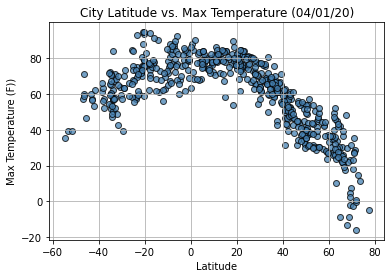

In [14]:
# Generate a scatter plot of latitude vs. max temperature.
plt.scatter(latitude,max_temp, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.grid()
plt.savefig('latvstemp.png')
plt.show()

#This code is analyzing the relationship between the maximum temperature of a city on 4/1/20 and the city's latitude. 
#The curve indicates that--with the exception of 5 outliers where the latitude is -20 to -40--that the max temperature is highest when one is within 20 degrees north or south of the equator.
#There seems to be only a slightly greater drop off in temperature when one goes _proportionally_ further north (this does not count 60 - 80 degrees latitude. The proportional decrease in temperature is greater as one goes farther from the equator, so it makes sense that the temperature drop in the 60-80 range is a lot sharper.)

In [15]:
## Latitude vs. Humidity Plot

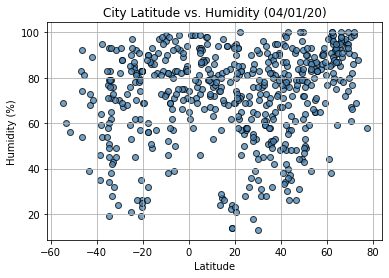

In [16]:
# Generate a scatter plot of latitude vs. humidity
plt.scatter(latitude,humidity, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('latvshumid.png')
plt.show()

#This code is analyzing the relationship between the percent of humidity of a city on 4/1/20 relative to the city's distance from the equator. 
#There doesn't appear to be a linear relationship between latitude and humidity. A majority of the cities' humidity is concentrated over 60% in both hemispheres.
#I believe it has more to do with the city's distance from a body of water that it's distance to the equator.

## Latitude vs. Cloudiness Plot

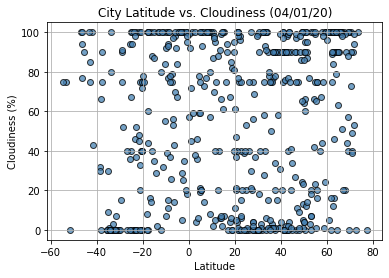

In [17]:
# Generate a scatter plot of latitude vs. cloudiness
plt.scatter(latitude,cloudiness, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('latvscloudy.png')
plt.show()

#This code is analyzing the relationship between the percent of cloudiness of a city on 4/1/20 and the city's distance from the equator. 
#There doesn't appear to be a linear relationship between city latitude. There is a lot of polarization in cloudiness, but it doesn't look like latitude is a significant factor.

## Latitude vs. Wind Speed Plot

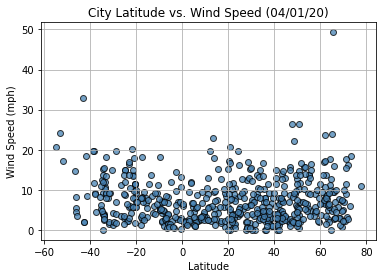

In [18]:
# Generate a scatter plot of latitude vs. wind speed
plt.scatter(latitude,wind_speed, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('latvswindspeed.png')
plt.show()

#This code is analyzing the relationship between the wind speed (mph) in a city on 4/1/20 and the city's distance from the equator. 
#There doesn't appear to be a relationship between latitude and wind speed, with a large majority of the cities' wind speeds concentrated below 20mph.

## Linear Regression

In [19]:
#Separate the datafames into northern and southern hemispheres.
nh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
sh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
nh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Trincomalee,8.5711,81.2335,80.04,79,100,6.67,LK,1635129085
2,Yellowknife,62.4560,-114.3525,39.72,100,75,13.80,CA,1635128821
5,Anadyr,64.7500,177.4833,-8.73,95,63,9.93,RU,1635129087
7,Ilulissat,69.2167,-51.1000,-1.86,74,57,7.23,GL,1635129088
8,Avera,33.1940,-82.5271,66.70,59,100,5.03,US,1635129088
...,...,...,...,...,...,...,...,...,...
540,Takoradze,4.8845,-1.7554,76.84,91,59,6.62,GH,1635129197
541,Palmer,42.1584,-72.3287,52.41,78,90,0.00,US,1635129321
543,Progreso,21.2833,-89.6667,84.31,85,77,7.65,MX,1635129322
548,Sangar,63.9242,127.4739,24.55,95,100,6.35,RU,1635129324


In [20]:
sh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.29,83,100,14.74,NZ,1635129085
3,Lorengau,-2.0226,147.2712,83.53,75,35,6.85,PG,1635128824
4,Port Alfred,-33.5906,26.8910,56.48,79,0,10.69,ZA,1635129086
6,Kalianget,-7.0500,113.9333,86.13,66,79,3.60,ID,1635129087
9,Pisco,-13.7000,-76.2167,61.02,82,2,13.80,PE,1635129089
...,...,...,...,...,...,...,...,...,...
542,Kirakira,-10.4544,161.9205,84.92,72,55,11.10,SB,1635129322
544,Quelimane,-17.8786,36.8883,76.95,88,0,8.05,MZ,1635129322
545,Isangel,-19.5500,169.2667,82.51,69,75,6.91,VU,1635129316
546,Kariba,-16.5167,28.8000,78.84,51,14,2.51,ZW,1635129323


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.8916678381879855


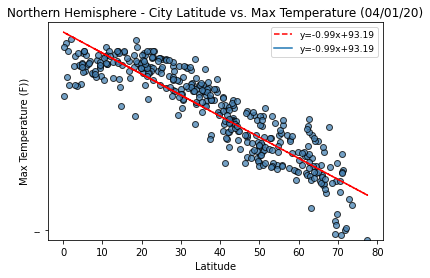

In [21]:
# Generate a scatter plot of latitude vs. max temperature - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
# plt.yticks(nh_clean_city_data['Max Temp'])

# Perform a linear regression on city latutide vs. max. temperature.
nhmt_slope, nhmt_int, nhmt_r, nhmt_p, nhmt_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Max Temp'])
# Create equation of line to calculate the fit and r-value.
nhmt_fit = nhmt_slope * nh_clean_city_data['Lat'] + nhmt_int
nhmt_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhmt_fit, "r--", "--", label='y={:.2f}x+{:.2f}'.format(nhmt_slope,nhmt_int))
plt.legend(fontsize=9)
plt.savefig('nhlatvstemp.png')

print(f"The r-value is : {nhmt_r}")

plt.show()

#The linear regression and r-value show a fairly strong negative relationship between latitude and max temperature, so it appears the max temperature is lower the farther north one goes from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.6290765028428978


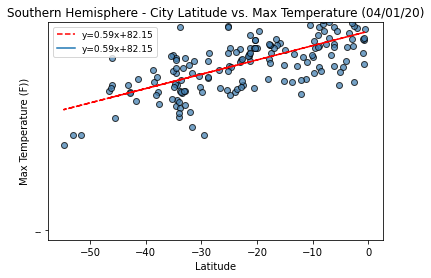

In [22]:
# Generate a scatter plot of latitude vs. max temperature - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')

# Perform a linear regression on city latutide vs. max. temperature.
shmt_slope, shmt_int, shmt_r, shmt_p, shmt_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Max Temp'])
# Create equation of line to calculate the fit and r-value.
shmt_fit = shmt_slope * sh_clean_city_data['Lat'] + shmt_int
shmt_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shmt_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shmt_slope,shmt_int))
plt.legend(fontsize=9)

plt.savefig('shlatvstemp.png')

print(f"The r-value is : {shmt_r}")

plt.show()

#The linear regression and r-value show a fairly moderate positive relationship between latitude and max temperature, so it appears the max temperature is higher the close north one goes to the equator.
#The r-value is not as strong in latitude vs. max temp as it is in the northern hemisphere. This may be because 1. there are fewer samples south of the equator, and 2. the northern hemisphere covers a larger area (up to 80 degrees above the equator, as opposed to less than 60 degrees below the equator.)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.18717625705632868


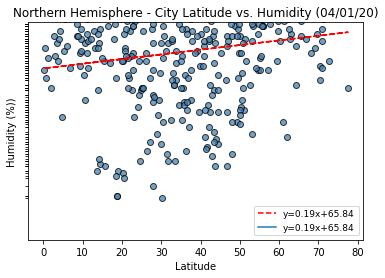

In [23]:
# Generate a scatter plot of latitude vs. humidity - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.yticks(nh_clean_city_data['Humidity'])

# Perform a linear regression on city latutide vs. humidity.
nhh_slope, nhh_int, nhh_r, nhh_p, nhh_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Humidity'])
# Create equation of line to calculate the fit and r-value.
nhh_fit = nhh_slope * nh_clean_city_data['Lat'] + nhh_int
nhh_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhh_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhh_slope,nhh_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvshumid.png')

print(f"The r-value is : {nhh_r}")

plt.show()

#There is a very weak positive relationship between city latitude and humidity in the northern hemisphere.
#This might be because the city's proximity to water might be a stronger factor in determining humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.24438999207670423


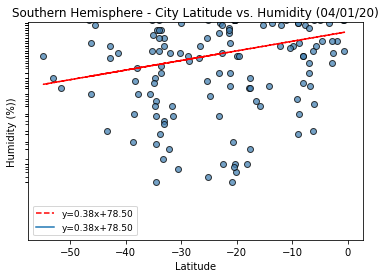

In [24]:
# Generate a scatter plot of latitude vs. humidity - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.yticks(sh_clean_city_data['Humidity'])

# Perform a linear regression on city latutide vs. humidity.
shh_slope, shh_int, shh_r, shh_p, shh_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Humidity'])
# Create equation of line to calculate the fit and r-value.
shh_fit = shh_slope * sh_clean_city_data['Lat'] + shh_int
shh_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shh_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shh_slope,shh_int))
plt.legend(fontsize=9)

plt.savefig('shlatvshumid.png')

print(f"The r-value is : {shh_r}")

plt.show()

#There is a very, very weak positive relationship between city latitude and humidity in the southern hemisphere (practially no relationship at all).
#This might be because the city's proximity to water might be a stronger factor in determining humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.10916977582167083


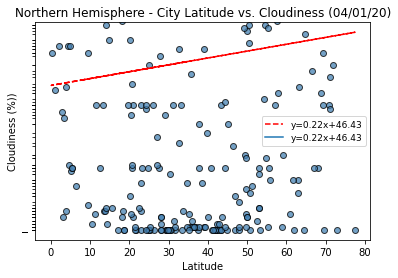

In [25]:
# Generate a scatter plot of latitude vs. cloudiness - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.yticks(nh_clean_city_data['Cloudiness'])

# Perform a linear regression on city latutide vs. cloudiness.
nhc_slope, nhc_int, nhc_r, nhc_p, nhc_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Cloudiness'])
# Create equation of line to calculate the fit and r-value.
nhc_fit = nhc_slope * nh_clean_city_data['Lat'] + nhc_int
nhc_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhc_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhc_slope,nhc_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvscloudy.png')

print(f"The r-value is : {nhc_r}")

plt.show()

#As with humidity, the low r-value indicates the positive relationship between the city latitude and % cloudiness is this data set is negligible.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.2743065251190191


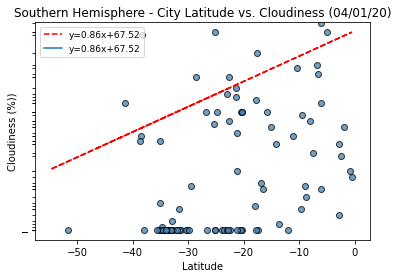

In [26]:
# Generate a scatter plot of latitude vs. cloudiness - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.yticks(sh_clean_city_data['Cloudiness'])

# Perform a linear regression on city latutide vs. cloudiness.
shc_slope, shc_int, shc_r, shc_p, shc_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Cloudiness'])
# Create equation of line to calculate the fit and r-value.
shc_fit = shc_slope * sh_clean_city_data['Lat'] + shc_int
shc_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shc_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shc_slope,shc_int))
plt.legend(fontsize=9)

plt.savefig('shlatvscloudy.png')

print(f"The r-value is : {shc_r}")

plt.show()

#As with humidity, the low r-value indicates the positive relationship between the city latitude and % cloudiness is this data set is negligible (even more so than in the northern hemisphere, but again, factors like a small sample size would come intp play, as well).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.19058604681976857


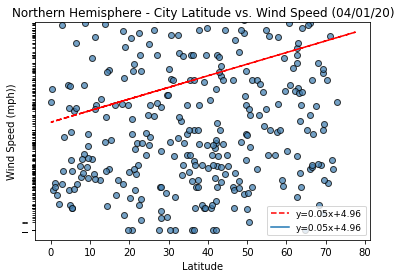

In [27]:
# Generate a scatter plot of latitude vs. wind speed - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.yticks(nh_clean_city_data['Wind Speed'])

# Perform a linear regression on city latutide vs. wind speed.
nhws_slope, nhws_int, nhws_r, nhws_p, nhws_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Wind Speed'])
# Create equation of line to calculate the fit and r-value.
nhws_fit = nhws_slope * nh_clean_city_data['Lat'] + nhws_int
nhws_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhws_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhws_slope,nhws_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvswindspeed.png')

print(f"The r-value is : {nhws_r}")

plt.show()

#It appears the  very low r-value and linear regression shows the positive relationship between wind speed and distance from the equator is negligible.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.34106837268339274


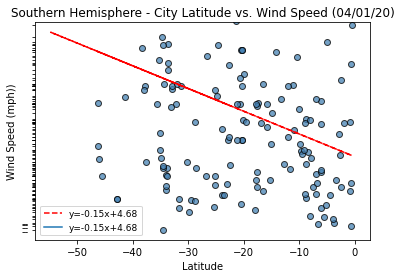

In [28]:
# Generate a scatter plot of latitude vs. wind speed - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.yticks(sh_clean_city_data['Wind Speed'])

# Perform a linear regression on city latutide vs. wind speed.
shws_slope, shws_int, shws_r, shws_p, shws_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Wind Speed'])
# Create equation of line to calculate the fit and r-value.
shws_fit = shws_slope * sh_clean_city_data['Lat'] + shws_int
shws_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shws_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shws_slope,shws_int))
plt.legend(fontsize=9)

plt.savefig('shlatvswindspeed.png')

print(f"The r-value is : {shws_r}")

plt.show()

#It appears the  very low r-value and linear regression shows the negative relationship between wind speed and distance from the equator is negligible.